# A simple example of working with a large file

### We will use named-entity recognition (NER) to attempt to extract the name of organisations mentioned in some Amazon reviews.

In [2]:
import pandas as pd
import spacy
from functools import reduce
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### A function we will use later to join a list of strings.

In [3]:
def join_strings(x, y):
    return(x + " " + y)

### The file we need is large so we will instead create a way to iterate through chunks of it.

In [4]:
def read_chunk(fname, chunk=100, rows=1000):
    df = pd.read_csv(fname, header=None, skiprows=1, chunksize=chunk, nrows=rows)
    return df

### This function will examine the result of the NER process and add organisations found to a list.

In [5]:
def extract_orgs(doc):
    for entity in doc.ents:
        if entity.label_ == "ORG":
            orgs.append(entity.text)

### This function reads a chunk of the reviews and joins the result into one large string of text which can be analysed by spacy. Notice the use of the 'reduce' function. This is known as a higher-order function as it takes another function as one of its arguments and applies it to each item of a list. In this case it uses the helper function we defined before called 'join_strings' and applies it directly to a specific column of the Pandas DataFrame.

In [6]:
def process(chunk):
    for df in chunk:
        text = reduce(join_strings, df[10])
        doc = nlp(text)
        extract_orgs(doc)

### We will record our results in a list.

In [7]:
orgs = []

### To carry out NER we use the provided pre-trained English language model. 

In [8]:
nlp = spacy.load("en_core_web_sm")

### This function will return immediately as it won't attempt to read the entire file.

In [9]:
chunk = read_chunk("../data/amazon_reviews_sample.csv")

### Because this function does all the heavy lifting it will take some time to execute.

In [10]:
process(chunk)

### A simple way to visualise the list of organisations found is to display them in a word cloud.

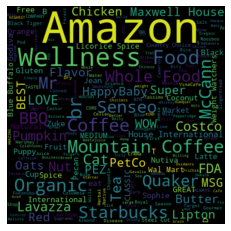

In [11]:
text = reduce(join_strings, orgs)
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()